In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import pdb
import numpy as np
import numpy.random as npr
import tensorflow as tf
import sys
import matplotlib.pyplot as plt
import re
from sklearn.decomposition import PCA
from numpy import linalg as LA
from scipy.spatial import distance
from scipy.linalg import subspace_angles
from sklearn.manifold import MDS
from sklearn.neighbors import DistanceMetric

import getpass
ui = getpass.getuser()
if ui == 'laura':
    p = '/home/laura'
elif ui == 'lauradriscoll':
    p = '/Users/lauradriscoll/Documents'

/Users/lauradriscoll/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [6]:
net = 'stepnet'
PATH_YANGNET = os.path.join(p,'code/multitask-nets',net)

sys.path.insert(0, PATH_YANGNET)
from task import generate_trials, rule_name, rule_index_map, rules_dict
from network import Model
import tools
from tools_lnd import plot_N, plot_FP, gen_trials_from_model_dir, name_best_ckpt, gen_X_from_model_dir_epoch, find_ckpts

In [24]:
print(ckpt_list)

[370000 376000 382000 388000 394000 400000 406000 412000 418000 424000
 430000 436000 442000 448000 454000 460000 466000]


In [25]:
W_in = []
model_n = 0

model_dir = os.path.join(p,'data/rnn/multitask/crystals/softplus/most',str(model_n))
s_all = find_ckpts(model_dir)
ckpt_list = np.sort(s_all)

for ckpt_n in ckpt_list: #155):
    ckpt_n_dir = os.path.join(model_dir,'ckpts/model.ckpt-' + str(int(ckpt_n)))
    model = Model(model_dir)
    with tf.Session() as sess:
        model.saver.restore(sess,ckpt_n_dir)
        model._sigma=0
        # get all connection weights and biases as tensorflow variables
        var_list = model.var_list
        # evaluate the parameters after training
        params = [sess.run(var) for var in var_list]

        
    w_in = np.expand_dims(params[0],axis=0)
    
#     b_in = params[1]
#     w_out = params[2]
#     b_out = params[3]
    
    print(np.shape(w_in))
    
    if len(W_in) is 0 :
        W_in = w_in
    else:
        W_in = np.concatenate((W_in,w_in),axis=0)

    

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/most/0/ckpts/model.ckpt-370000
(1, 281, 256)
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/most/0/ckpts/model.ckpt-371000
(1, 281, 256)
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(2

(1, 281, 256)
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/most/0/ckpts/model.ckpt-388000
(1, 281, 256)
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/most/0/ckpts/model.ckpt-389000
(1, 281, 256)
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kern

(1, 281, 256)
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/most/0/ckpts/model.ckpt-406000
(1, 281, 256)
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/most/0/ckpts/model.ckpt-407000
(1, 281, 256)
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kern

(1, 281, 256)
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/most/0/ckpts/model.ckpt-424000
(1, 281, 256)
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/most/0/ckpts/model.ckpt-425000
(1, 281, 256)
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kern

(1, 281, 256)
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/most/0/ckpts/model.ckpt-442000
(1, 281, 256)
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/most/0/ckpts/model.ckpt-443000
(1, 281, 256)
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kern

(1, 281, 256)
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/most/0/ckpts/model.ckpt-460000
(1, 281, 256)
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/most/0/ckpts/model.ckpt-461000
(1, 281, 256)
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kern

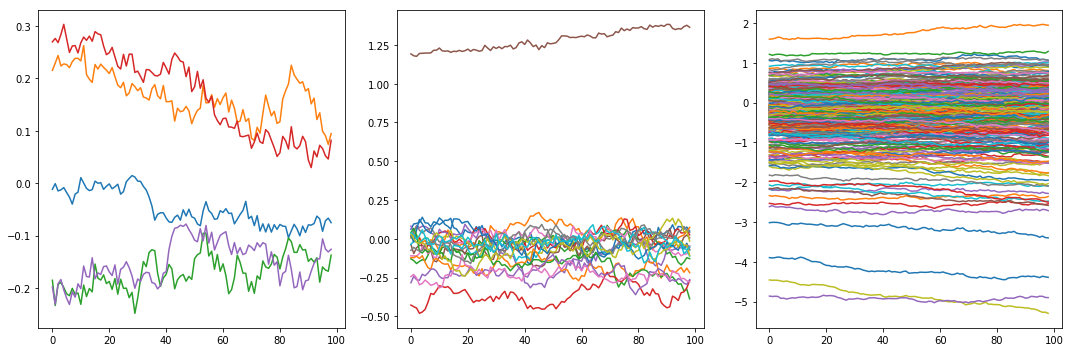

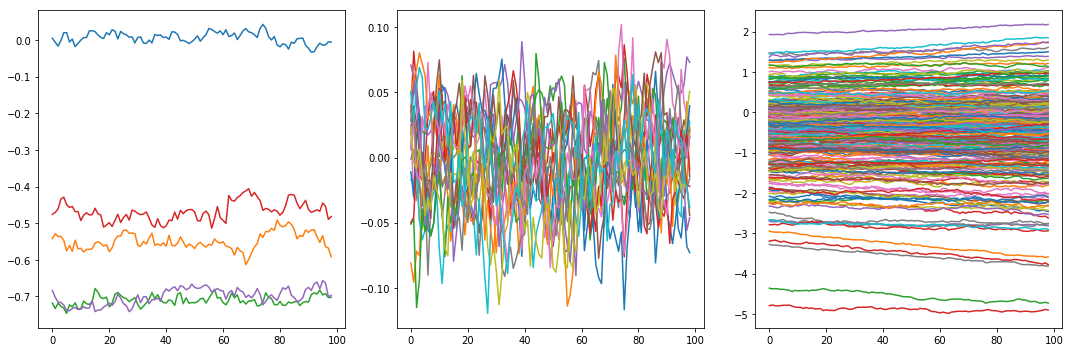

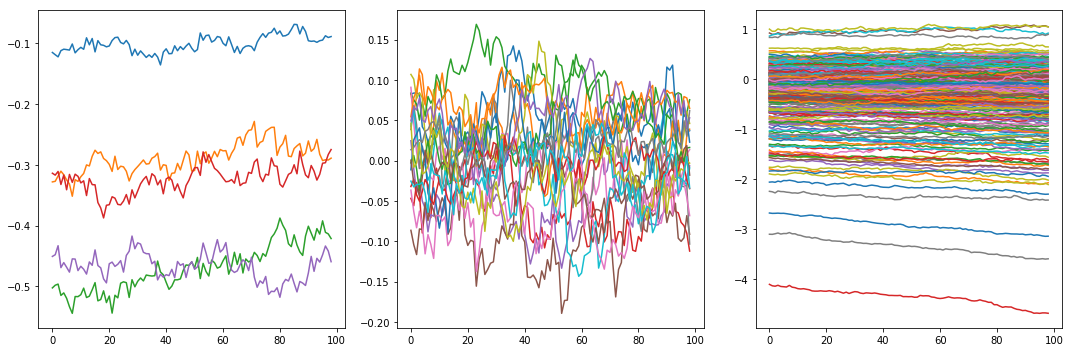

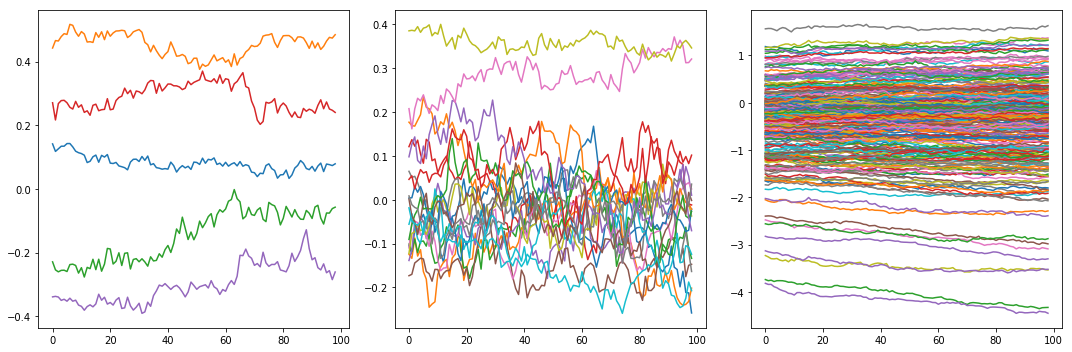

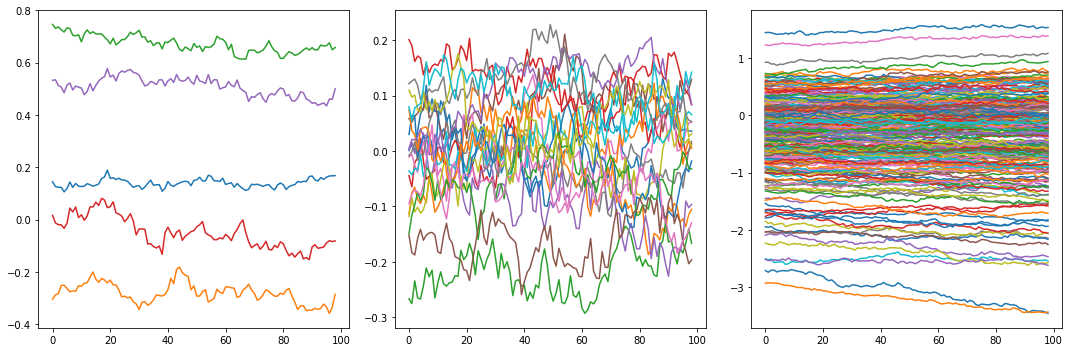

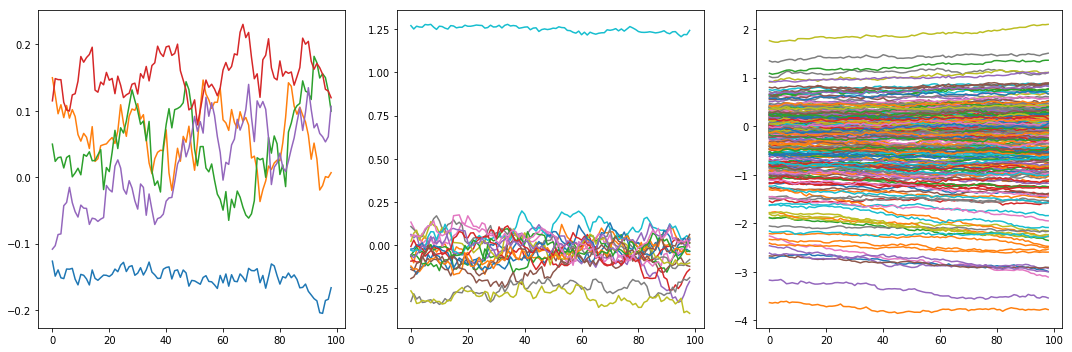

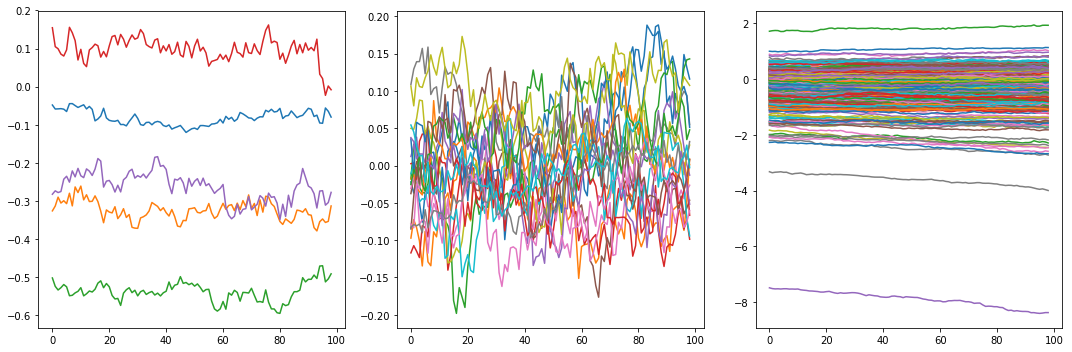

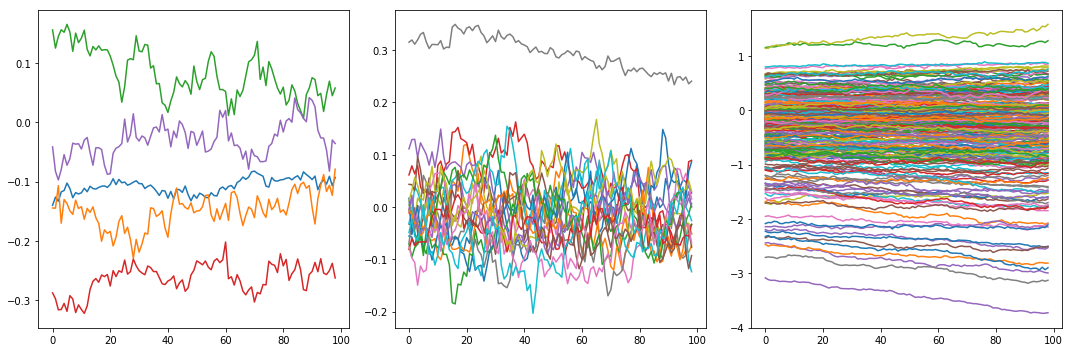

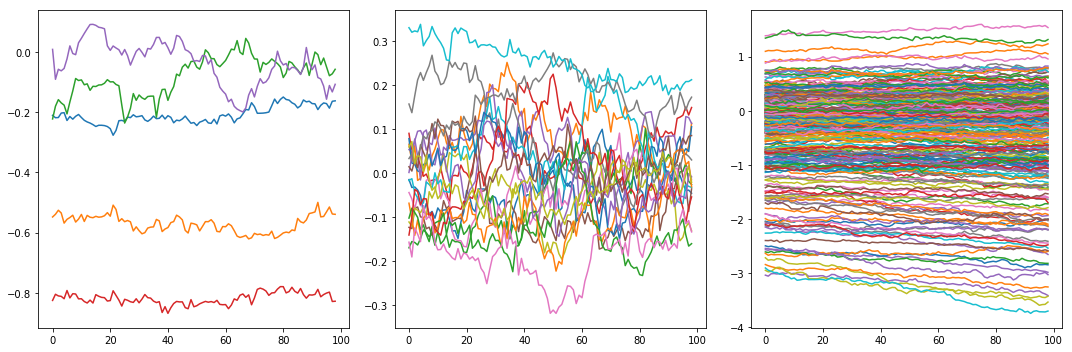

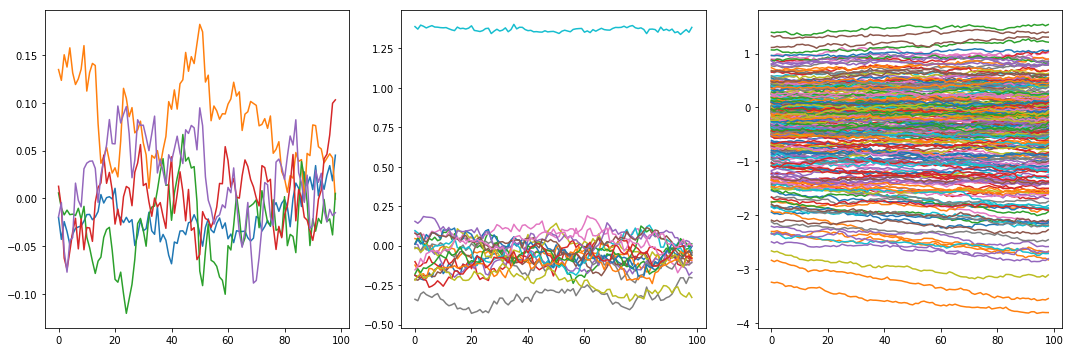

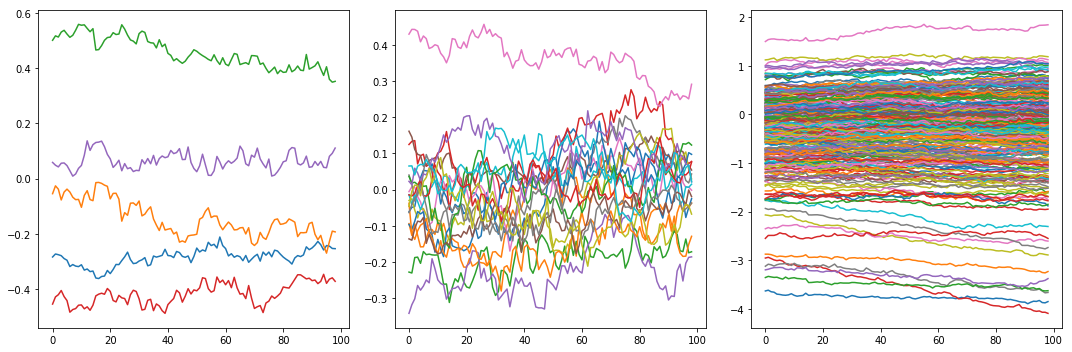

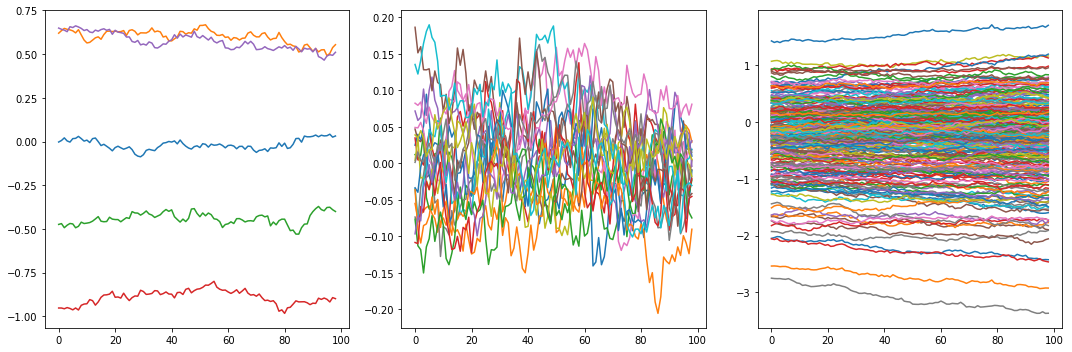

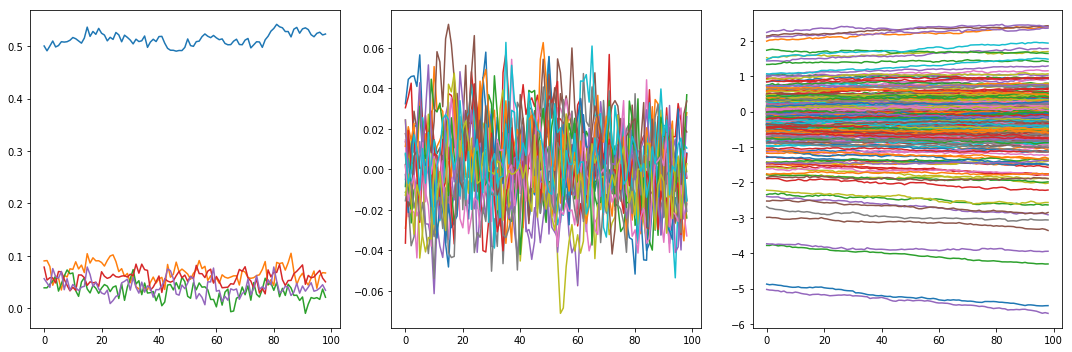

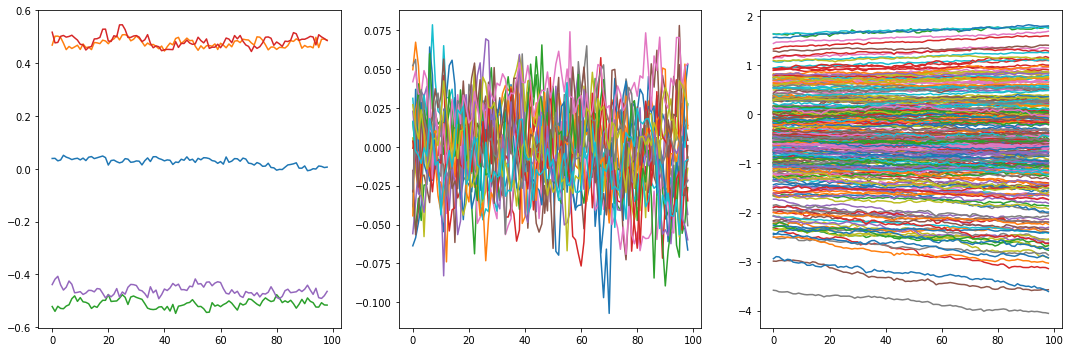

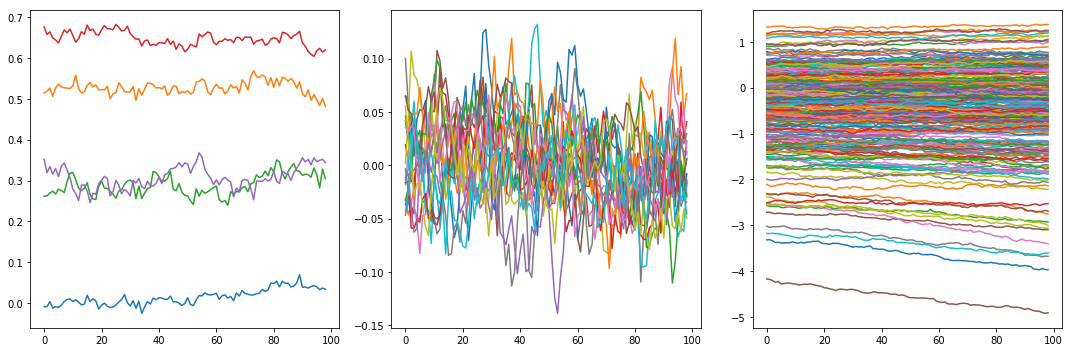

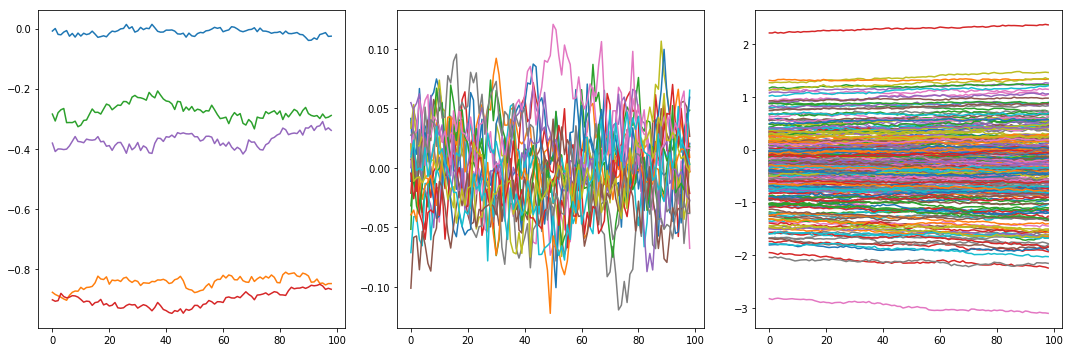

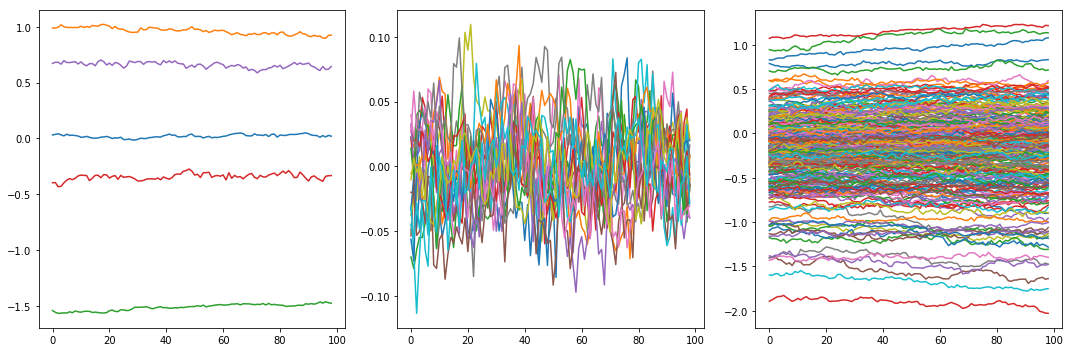

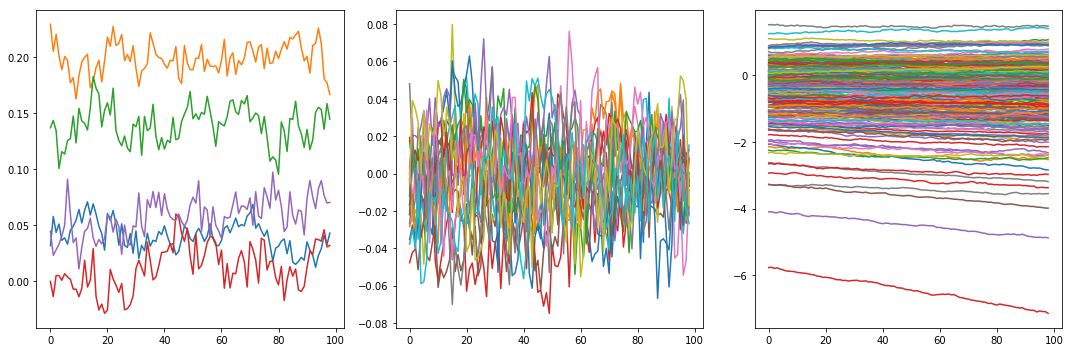

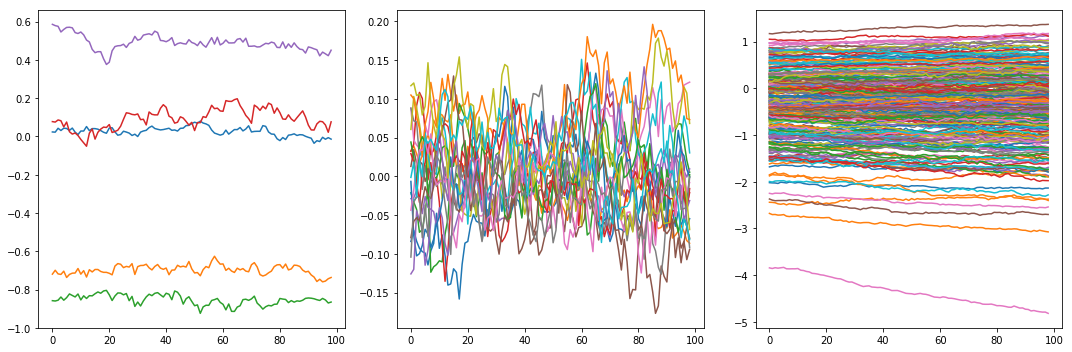

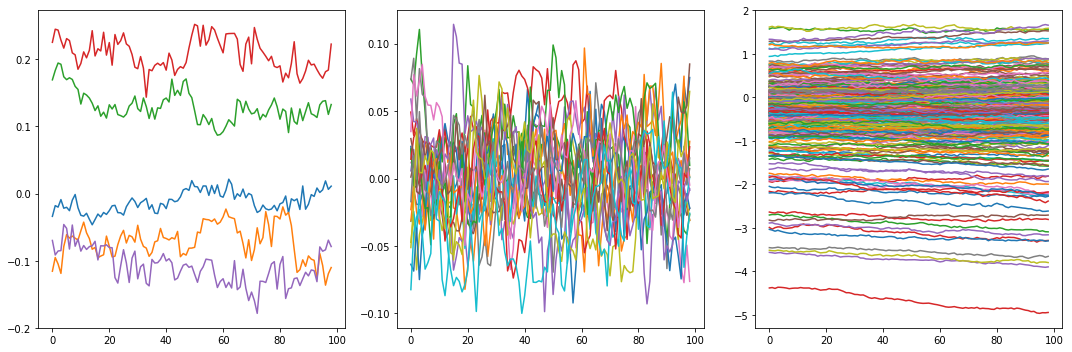

In [26]:
# for x in range(10):
#     plt.plot(W_in[:,1:10,x])
#     plt.show()

for x in range(20):
    fig = plt.figure(figsize=(15, 5),tight_layout=True,facecolor='white')
    
    plt.subplot(1, 3, 1)
    plt.plot(W_in[:,:5,x])
    
    plt.subplot(1, 3, 2)
    plt.plot(W_in[:,5:25,x])
    
    plt.subplot(1, 3, 3)
    plt.plot(W_in[:,25:,x])
    
    plt.show()

In [ ]:
epoch = 'stim1'
trial_inds = range(trial.epochs[epoch][0],trial.epochs[epoch][1])
trial_inds = range(0,25)

# ckpt_list = range(int(range_lims[0]),int(range_lims[1]+10000),10000)
# N,S,T = np.shape(Z['t'])
S = np.shape(Z_sall[str(ckpt_n)])[0]
cmap=plt.get_cmap('rainbow')
plt.figure(figsize=(15,len(ckpt_list)*5),tight_layout=True,facecolor='white')
# plt.figure(figsize=(10,10),tight_layout=True,facecolor='white')
plt.rcParams.update({'font.size': 16})
col = 3

ck = 0
for ckpt_n in ckpt_list:#155):
    ck+=col
    
    for s in range(0,S,2):
        c = cmap(s/S)
#         plt.subplot(len(ckpt_list),col,ck-3)
#         plt.plot(Z_tall[str(ckpt_n)][1,s,trial_inds],Z_stall[str(ckpt_n)][0,s,trial_inds],'-',c = c,linewidth = .2)
        
        plt.subplot(len(ckpt_list),col,ck-2)
#         plt.plot(Z_sall[str(ckpt_n)][0,s,trial_inds],Z_sall[str(ckpt_n)][1,s,trial_inds],'-',c = c,linewidth = .2,markersize = .2)
        plt.plot(Z_sall[str(ckpt_n)][s,0],Z_sall[str(ckpt_n)][s,1],'.',c = c,linewidth = .2,markersize = 5)
        plt.plot(Z_sall[str(ckpt_n)][s+1,0],Z_sall[str(ckpt_n)][s+1,1],'o',c = c,linewidth = .2,markerfacecolor='none',markersize = 5)
        plt.axis('equal')
        plt.xlabel('dPC1')
        plt.ylabel('dPC2')
        
#         plt.subplot(len(ckpt_list),col,ck-1)
#         plt.plot(Z_sall[str(ckpt_n)][s,2],Z_sall[str(ckpt_n)][s,3],'.',c = c,linewidth = .2,markersize = 5)
#         plt.axis('equal')
#         plt.xlabel('dPC3')
#         plt.ylabel('dPC4')
        
#         plt.subplot(len(ckpt_list),col,ck)
#         plt.plot(Z_sall[str(ckpt_n)][s,4],Z_sall[str(ckpt_n)][s,5],'.',c = c,linewidth = .2,markersize = 5)
#         plt.axis('equal')
#         plt.xlabel('dPC5')
#         plt.ylabel('dPC6')
    
    plt.title('ckpt # : ' + str(ckpt_n))

plt.show()
plt.savefig('cosyne/delaygo_computation/' + figname +'_'+ epoch + '.svg')
#     plt.axis('equal')